## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df_ab = pd.read_csv('ab_data.csv')
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df_ab.count()[0]

294478

c. The number of unique users in the dataset.

In [4]:
df_ab.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df_ab.converted.sum()/df_ab.count()[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
not_lined_up = df_ab[(df_ab['group']=='treatment') & (df_ab['landing_page']!= 'new_page')|(df_ab['group']=='control') & (df_ab['landing_page']!= 'old_page')]

not_lined_up.count()[0]
#Here we found all the rows that doesn't have the consistent pair of (group,landing_page) which are (treatment,new_page) OR
#(Control,old_page)

3893

f. Do any of the rows have missing values?

In [7]:
df_ab.info() #From the output we know that the answer is no, all the rows are complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df_ab.query('(group == "treatment" & landing_page == "new_page")|(group == "control" & landing_page == "old_page")')
#query for having only the rows that have group and landing page are consistent, (treatment,new_page) OR (control,old_page)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated(keep=False)].user_id #Therefore the repeated id is 773192

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates('user_id', keep ='first')
assert df2.user_id.duplicated().sum() == 0 #To make sure the duplicated rows are removed

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.sum()/df2.count()[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [38]:
dfX = df2.query('group == "control"')
control_convert = dfX.converted.sum()/dfX.count()[0]
control_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [39]:
dfX = df2.query('group == "treatment"')
treatment_convert = dfX.converted.sum()/dfX.count()[0]
treatment_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2[df2['landing_page'] == 'new_page'].count()[0]/df2.count()[0]

0.50006194422266881

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### Answer to (e)

> Even we had some values like the mean of control group converted > the mean of the treatment group converted, we don't have evidence that this is not an act of chance, we can do this by by the use of confidence intervals or A/B testing  hypothesis testing

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Answer

$ H_{0}\rightarrow p_{new}-p_{old} \leq 0 \\ 
 H_{1}\rightarrow p_{new}-p_{old} > 0 $

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#Since under the null hypothesis , both have the same convert rate, then we will calculate it regardless the page
CRnew = df2.converted.sum()/df2.count()[0]
CRnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
CRold = df2.converted.sum()/df2.count()[0]
CRold

0.11959708724499628

c. What is $n_{new}$?

In [20]:
n_new = df2[df2['landing_page']=='new_page'].count()[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = df2[df2['landing_page']=='old_page'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = pd.DataFrame(np.random.choice([0,1],n_new,p=[1-CRnew,CRnew]))

#Simulated a random choice of 0's and 1's according to the probability under the null hypothesis , with size = n_new

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = pd.DataFrame(np.random.choice([0,1],n_old,p=[1-CRold,CRold]))
#Simulated a random choice of 0's and 1's according to the probability under the null hypothesis , with size = n_old

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.sum()/len(new_page_converted) - old_page_converted.sum()/len(old_page_converted)
#It gives nearly = to 0 value

0    0.002035
dtype: float64

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = np.random.binomial(n_new, CRnew, 10000)/n_new - np.random.binomial(n_old, CRold, 10000)/n_old
#Used this to simulate 10000 iterations of binomial choices bases on the probability CRnew,CRold which are equal (P_null)
#we put the difference in an list called p_diffs

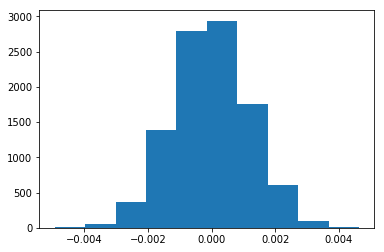

In [26]:
#Convert to array
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
null_vals = np.random.normal(0,np.std(p_diffs),10000)#Converting to be a distribution under tha null

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    4.,    94.,   445.,  1550.,  2866.,  2847.,  1624.,   477.,
           88.,     5.]),
 array([ -4.80965575e-03,  -3.85338345e-03,  -2.89711116e-03,
         -1.94083886e-03,  -9.84566570e-04,  -2.82942749e-05,
          9.27978020e-04,   1.88425032e-03,   2.84052261e-03,
          3.79679491e-03,   4.75306720e-03]),
 <a list of 10 Patch objects>)

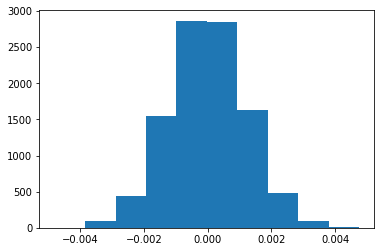

In [27]:
plt.hist(null_vals)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
#Since we assumed that both p_new ,p_old are equal to the converted rate in ab_data, then the actual difference we will use = 0
p = (null_vals>treatment_convert-control_convert).mean()
p

0.90410000000000001

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Answer
> This value is called the p-value, which is defined as the probability of observing a statistic to be in favor of the alternative hypothesis (p_null_vals > 0) when the Null $H_0$ is True

> Right now we have an 0.904 proportion that is extreme from the null hypothesis,also we have a critical level $\Large \alpha$ = 0.05, so we have a statistical evidence that we can reject the null hypothesis ($p_{value} > \alpha $)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 & landing_page == "old_page"').count()[0]
convert_new = df2.query('converted == 1 & landing_page == "new_page"').count()[0]
n_old = df2.query('landing_page=="old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]
convert_old/n_old , convert_new/n_new

E:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(0.1203863045004612, 0.11880806551510564)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [43]:
z_score , p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old],alternative='larger')
print(z_score,p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### Answer to (n)

> It means that we can reject the null hypothesis as we have a p-value larger than the threshold $\alpha$

> Yes they agree with the findings in parts j and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Answer
> Logistic Regression will be the type of regression used here

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
dfX = df2
dfX['intercept'] = 1
dfX[['X','ab_page']] =pd.get_dummies(dfX['group'])
dfX = dfX.drop(['X'],axis=1)
dfX.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
Logit_mod = sm.Logit(dfX['converted'],dfX[['intercept','ab_page']])
results = Logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        12:54:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### Answer

> p_value = 0.19

>They are different because it is two tailed, while the part II p-value was one tailed

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Answer
> Considering other factors other that a single factor will make our fit model more realistic, because this is the real case, a superposition of factors influence someone to do a certain action and that is what we are trying to model

> I think the main disadvantage would be the colinearity, while i am adding some factors, some factors could be correlated together, and this can lead us to misleading coeffcients results

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(dfX.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [35]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop('CA',axis=1) #Making the CA column the baseline for country
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [36]:
Logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US']])
results = Logit_mod.fit()
print(results.summary())
print(np.exp(-0.0149),np.exp(0.0506),np.exp(0.0408))

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        12:54:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.

### Answer To (g)
> Here we fitted the model based on the effect of the page type, and the effect of the country of user

> So we can say for ab_page, We can Expect a multiplicative change in the odds of 1 by (0.985) Compared to the page base line

> And for UK, We can Expect a multiplicative change in the odds of 1 by (1.051) Compared to the country base line

> And for US, We can Expect a multiplicative change in the odds of 1 by (1.04) Compared to the country base line

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.

In [37]:
### Fit Your Linear Model And Obtain the Results
df_new['UK_ind_ab_page'] = df_new['UK']*df_new['ab_page']#Creating new dummy variables by multiplying each country and ab_page columns
df_new['US_ind_ab_page'] = df_new['US']*df_new['ab_page']
Log_mod = sm.Logit(df_new['converted'],df_new[['intercept','US_ind_ab_page','UK_ind_ab_page']])
results = Log_mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 25 Jun 2018   Pseudo R-squ.:               1.082e-05
Time:                        12:54:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9926      0.008   -252.910      0.000      -2.008      -1.977
US_ind_ab_page   

### Answer of (h)

> So we multiplied each column of country by the column of ab_page, to make an interaction between them

> Then we fitted a model to see if this interaction is significant in determining the Convertion

> We aquired p_values of 0.248, 0.532 which are too large (> $\alpha$)

> So that means we dont have statistical evidence that we can anticipate the convertion rate based on interaction between page and country.

### Summary

> From the above results, we fitted models for predicting convertion with respect to a certain page, and also with respect to both page_type and country

> And at last we fitted a logistic model to see the relation between country and page_used

> The models for predicting the converting outputs worked well with a fair p-value, and i've stated the interpretation of each

> The last model had kind of large p_values which make it not reasonable to predict the page_type from the country

<a id='conclusions'></a>
## Conclusions

> 1- We can reject the state which we put as the null hypothesis (new page convertion rate is the same or less than old page)

> 2- Also we can say that it is hard to say there is a relation between page and convertion rates (which means it is hard to predict one from another) Or country , because the p-values exceeds the threshold (0.05)

> 3- As a practical reasoning, one can deduce that it's not too wise to take an action like (go for a certain decision) because we have very large sample, that large amount of users converted while using the old_page, so we must pay attention to this before any real decision is made

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.